Random initial floorplan
Table count: 11
Place count: 60


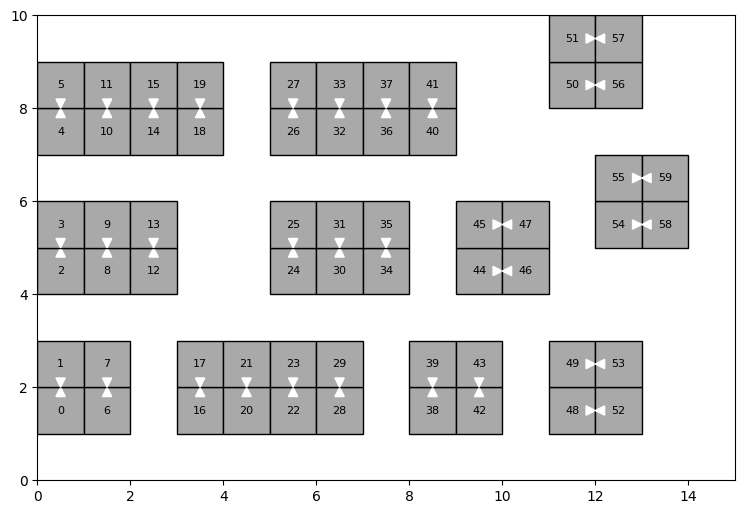

Applying rules:
	adjacent: gender = False
Target fitness set to 80%
Random initial assignment


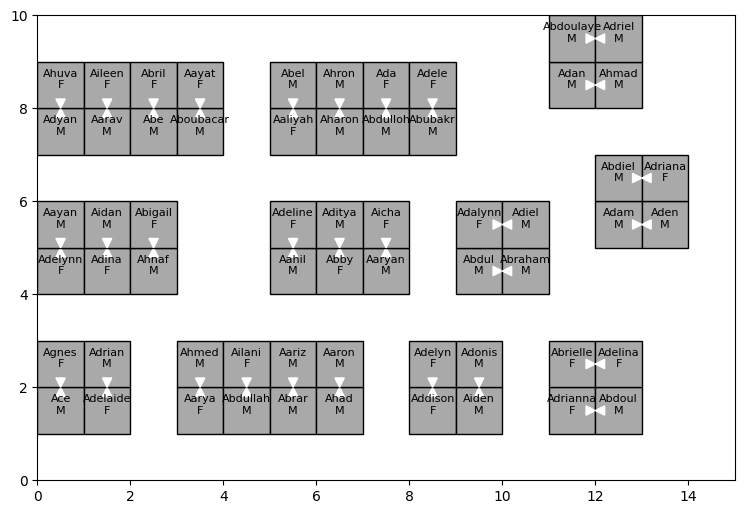


SUCCESS, 80.0% after 31306 iterations, in 2.21 seconds. Throughput: 14191.72


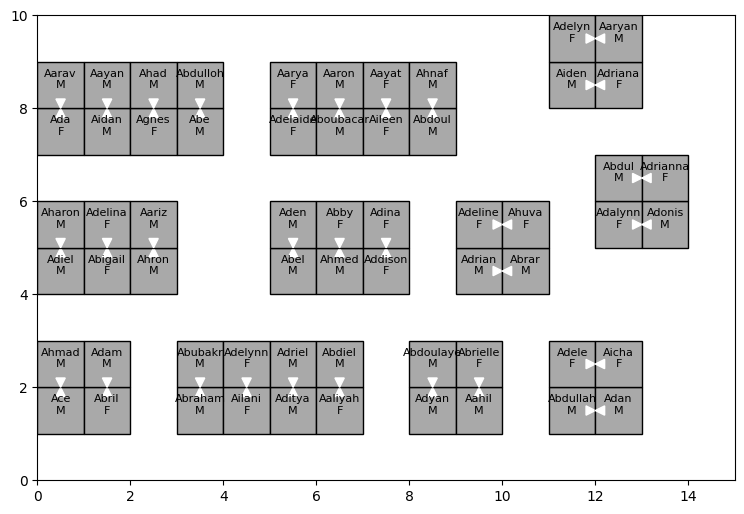

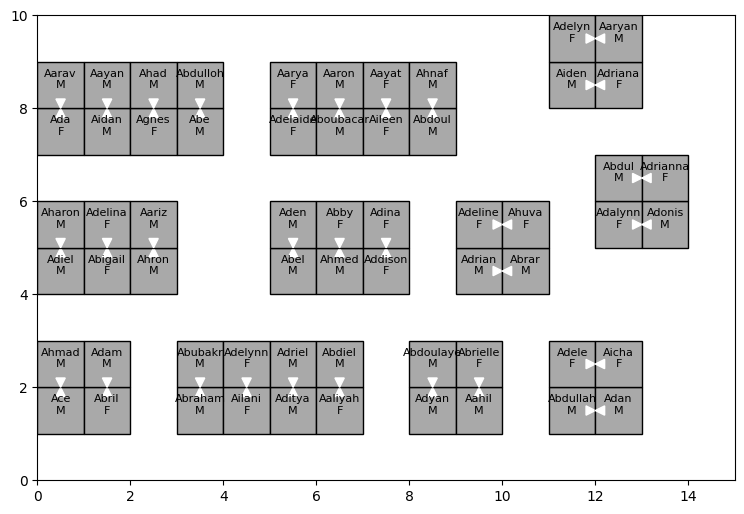

In [1]:
import pyseater as ps
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [9, 9] # adjust this to get a good fig size depending on the display you're using...
params = ps.Parameters()
params.n_rows = 10
params.n_cols = 15
params.font_size = 8
params.target_fitness = 80
params.student_file = "data/name-gender.csv"
seater = ps.Pyseater(params.n_rows, params.n_cols)
ps.generate_random_floorplan(seater)
print("Random initial floorplan")
print("Table count: " + str(len(seater.tables)))
print("Place count: " + str(seater.n_places))
ps.draw_floorplan(seater, params)

seater.adj_rules.append(ps.Rule("gender", False))
# seater.adj_rules.append(ps.Rule("language", False))
# seater.adj_rules.append(ps.Rule("game", False))

if(params.log_level > 0) : print("Applying rules:")
for adj_rule in seater.adj_rules :
    if(params.log_level > 0) : print("\tadjacent: " + str(adj_rule.attribute) + " = " + str(adj_rule.boolean))
for ops_rule in seater.ops_rules :
    if(params.log_level > 0) : print("\topposite:" + str(ops_rule.attribute) + " = " + str(ops_rule.boolean))

if params.seed :
    if(params.log_level > 0) : print("Seed will be set to " + str(params.seed))
    rng.seed(params.seed)

if params.target_fitness :
    if(params.log_level > 0) : print("Target fitness set to " + str(params.target_fitness) + "%")
params.target_fitness = (params.target_fitness / 100) * (seater.n_places * (len(seater.adj_rules) + len(seater.ops_rules)))

ps.do_random_assignment(seater, params)
print("Random initial assignment")
ps.draw_floorplan(seater, params)
seater.solve(params)
ps.draw_floorplan(seater, params)